In [4]:
 os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint
# from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from skimage import io
import cv2
#from utils import INPUT_SHAPE, batch_generator
import matplotlib.pyplot as plt
import argparse
import os



In [6]:
#Datadir = 'C:/Users/vtshu/Downloads/simulator-windows-64' ## change to current dir
Datadir = r'C:\Users\Rudresh\Downloads\Autocar' #Rudresh-laptop

data_df = pd.read_csv(os.path.join(Datadir, 'driving_log.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [7]:
data_df


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.979136
1,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.908142
2,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.823891
3,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.740652
4,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.672053
...,...,...,...,...,...,...,...
3096,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,15.362710
3097,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,15.737150
3098,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,15.553660
3099,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,14.823750


In [8]:
#data_df['steering']=50

In [9]:
data_df

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.979136
1,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.908142
2,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.823891
3,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.740652
4,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,6.672053
...,...,...,...,...,...,...,...
3096,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,15.362710
3097,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,15.737150
3098,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,15.553660
3099,C:\Users\Rudresh\Downloads\simulator-windows-6...,C:\Users\Rudresh\Downloads\simulator-windows-...,C:\Users\Rudresh\Downloads\simulator-windows-...,0.0,0.0,0,14.823750


C:\Users\Rudresh\Downloads\simulator-windows-64 (1)\Default Windows desktop 64-bit_Data\IMG\center_2022_10_19_21_19_42_739.jpg
(160, 320, 3)


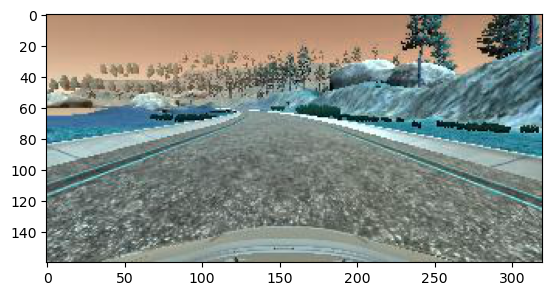

 C:\Users\Rudresh\Downloads\simulator-windows-64 (1)\Default Windows desktop 64-bit_Data\IMG\left_2022_10_19_21_19_42_739.jpg
(160, 320, 3)


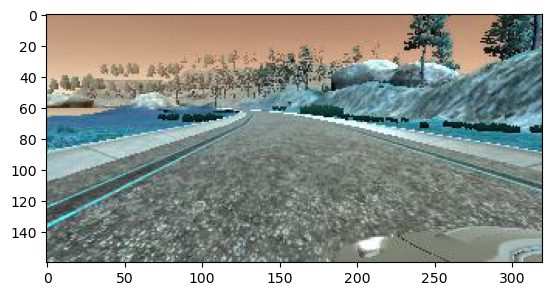

 C:\Users\Rudresh\Downloads\simulator-windows-64 (1)\Default Windows desktop 64-bit_Data\IMG\right_2022_10_19_21_19_42_739.jpg
(160, 320, 3)


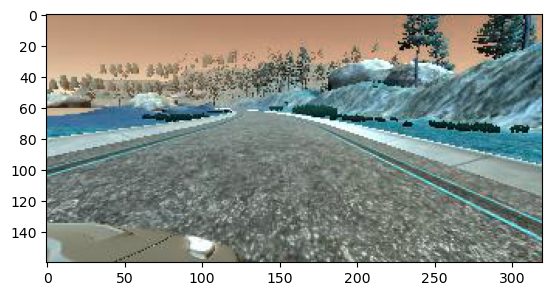

In [10]:
X = data_df[['center', 'left', 'right']].values
    #and our steering commands as our output data
y = data_df['steering'].values

    #now we can split the data into a training (80), testing(20), and validation set
    #thanks scikit learn
X_train_path, X_test_path, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


for i in range(3):    
    ex = X_train_path[0][i]
    print(ex)
    out = cv2.imread(ex.strip())
    print(out.shape)
    plt.imshow(out)
    plt.show()



In [11]:
#y_train
print(X.shape)
print(y.shape)
print(X_train_path.shape) 
print(X_test_path.shape) 
print(y_train.shape)
print(y_test.shape)

(3101, 3)
(3101,)
(2480, 3)
(621, 3)
(2480,)
(621,)


In [12]:
# def convert_data(Dataset):
#     numset = []
#     for i in range(Dataset.shape[0]):
#         path_list = []
#         for j in Dataset[i]:           
            
#             img = cv2.imread(j)
#             #print(f'image shape {img.shape}')
#             path_list.append(img)           
# #             break
#         numset.append(path_list)
#     return numset
# #         break
# X_train = convert_data(X_train_path)
# X_test = convert_data(X_test_path)

# # print(np.shape(np.array(training_data)))
# # print(len(y))
# print(np.shape(np.array(X_train[0][0])))        
# print(np.shape(np.array(X_train))) 
# print(np.shape(np.array(X_test))) 
# print(np.shape(np.array(y_train))) 
# print(np.shape(np.array(y_test))) 
# X_train = np.array(X_train).reshape(-1,3,160,320)
# X_test = np.array(X_test).reshape(-1,3,160)
    

In [13]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
from sqlalchemy import true

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66,200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

def load_image(data_dir, image_file):
    """
    Load RGB images from a file
    """
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))


def crop(image):
    """
    Crop the image (removing the sky at the top and the car front at the bottom)
    """
    return image[60:-25, :, :] # remove the sky and the car front


def resize(image):
    """
    Resize the image to the input shape used by the network model
    """
    return cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)


def rgb2yuv(image):
    """
    Convert the image from RGB to YUV (This is what the NVIDIA model does)
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)


def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = crop(image)
    image = resize(image)
    image = rgb2yuv(image)
    return image


def choose_image(data_dir, center, left, right, steering_angle):
    """
    Randomly choose an image from the center, left or right, and adjust
    the steering angle.
    """
    choice = np.random.choice(3)
    if choice == 0:
        return load_image(data_dir, left), steering_angle + 0.2
    elif choice == 1:
        return load_image(data_dir, right), steering_angle - 0.2
    return load_image(data_dir, center), steering_angle


def random_flip(image, steering_angle):
    """
    Randomly flipt the image left <-> right, and adjust the steering angle.
    """
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
    return image, steering_angle


def random_translate(image, steering_angle, range_x, range_y):
    """
    Randomly shift the image virtially and horizontally (translation).
    """
    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    steering_angle += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, steering_angle


def random_shadow(image):
    """
    Generates and adds random shadow
    """
    # (x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
    x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT
    xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]

    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    image=preprocess(image)
    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)


def random_brightness(image):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


def augument(data_dir, center, left, right, steering_angle, range_x=100, range_y=10):
    """
    Generate an augumented image and adjust steering angle.
    (The steering angle is associated with the center image)
    """
    image, steering_angle = choose_image(data_dir, center, left, right, steering_angle)
    image, steering_angle = random_flip(image, steering_angle)
    image, steering_angle = random_translate(image, steering_angle, range_x, range_y)
    #image = random_shadow(image)
    image = random_brightness(image)
    return image, steering_angle


def batch_generator2(data_dir, image_paths, steering_angles, batch_size, is_training):
    print('Hey')
    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            # argumentation
            if is_training and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            # add the image and steering angle to the batch
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        return images, steers
    
    
    



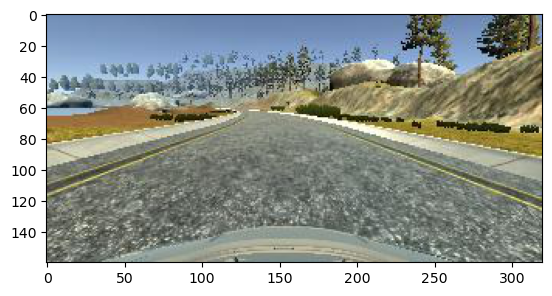

In [14]:
plt.imshow(mpimg.imread(X_train_path[0][0]))

In [15]:
X_train_path[0][0]

'C:\\Users\\Rudresh\\Downloads\\simulator-windows-64 (1)\\Default Windows desktop 64-bit_Data\\IMG\\center_2022_10_19_21_19_42_739.jpg'

In [16]:
X_train,y_train = batch_generator2(Datadir, X_train_path, y_train,X_train_path.shape[0] , True)#

Hey


In [17]:
X_test,y_test = batch_generator2(Datadir, X_test_path, y_test, X_test_path.shape[0], False)

Hey


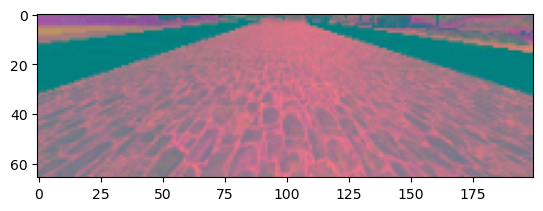

In [18]:
plt.imshow(X_train[15]/255)

In [19]:
X_train.shape

(2480, 66, 200, 3)

In [20]:
X_test.shape

(621, 66, 200, 3)

In [21]:
#pleaseeeeeeeeeeeeeeeee note that u have made x/127.5-1.0 here

X_train = np.array(X_train).reshape(-1,3,IMAGE_HEIGHT,IMAGE_WIDTH)
X_test = np.array(X_test).reshape(-1,3,IMAGE_HEIGHT,IMAGE_WIDTH)
X_train = np.array(X_train)/127.5-1.0
X_test= np.array(X_test)/127.5-1.0  

In [22]:
X_train.shape

(2480, 3, 66, 200)

In [23]:
X_test.shape

(621, 3, 66, 200)

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [25]:
class Autocar_data(Dataset):
    def __init__(self,x,y,transforms = None):
        self.X = x
        self.Y = y
        self.transforms = transforms
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,index):
        x = torch.tensor(self.X[index,:,:])
        y = torch.tensor(self.Y[index])
        
        return x,y

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#in_channels = 3
#out_channels = 2
learning_rate = 0.001
batch_size = 64
num_epochs = 10  ##change to 10

In [27]:
train_set = Autocar_data(X_train, y_train)
test_set = Autocar_data(X_test,y_test)

train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_set, batch_size= batch_size*30,shuffle = True)  ## batch_size*30 so it tests in one epoch


In [28]:
y_test[0:15]

array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
       -0.280893 ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       , -0.4135083,  0.       ,  0.       ])

In [29]:
class CNN(nn.Module):
    def __init__(self,in_channels=3,num_classes=1):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=24,kernel_size=(5,5),stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=24,out_channels=36,kernel_size=(5,5),stride=(2,2))
        self.conv3 = nn.Conv2d(in_channels=36,out_channels=48,kernel_size=(5,5),stride=(2,2))
        self.conv4 = nn.Conv2d(in_channels=48,out_channels=64,kernel_size=(3,3))
        self.conv5 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3))
        #[(W−K+2P)/S]+1       
        self.fc1 = nn.Linear(64*1*18, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 1)
        
        
    def forward(self,x):
        x = F.relu(self.conv1(x.float()))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
              
        x = x.reshape(x.shape[0],-1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        
        return x
    
# model = CNN()
# x = torch.rand(64,3,66,200)
# print(model(x).shape)

In [30]:
model = CNN().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

In [31]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
NVIDIA GeForce RTX 3060 Laptop GPU


In [32]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [33]:
CUDA_LAUNCH_BLOCKING=1

In [34]:
for epoch in range(num_epochs):
    print(f'current epoch number: {epoch}')
    for batch_idx, (data,targets) in enumerate(train_loader):
        data = data.to(device = device)
        targets = targets.to(device = device).long()
        scores = model(data)
        loss = criterion(scores,targets)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

current epoch number: 0


RuntimeError: CUDA error: CUBLAS_STATUS_EXECUTION_FAILED when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`

In [29]:
def check_accuracy(loader,model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            
            scores = model(x)
            
            _,prediction = scores.max(1)
            print(f'scores   {scores}')
            print(f'prediction    {prediction}')
            print(f'y   {y}')
            num_correct += (prediction == y).sum()
            num_samples += prediction.size(0)
            
            print(f'Got {num_correct}/{num_samples} with accuracy {float (num_correct)/float(num_samples)*100:.2f}')
    model.train()
    
check_accuracy(train_loader,model)
check_accuracy(test_loader,model)

scores   tensor([[0.1381],
        [0.1377],
        [0.1377],
        [0.1381],
        [0.1377],
        [0.1379],
        [0.1379],
        [0.1379],
        [0.1379],
        [0.1379],
        [0.1380],
        [0.1380],
        [0.1379],
        [0.1378],
        [0.1380],
        [0.1379],
        [0.1380],
        [0.1377],
        [0.1377],
        [0.1378],
        [0.1376],
        [0.1379],
        [0.1378],
        [0.1378],
        [0.1380],
        [0.1377],
        [0.1380],
        [0.1377],
        [0.1378],
        [0.1376],
        [0.1380],
        [0.1377],
        [0.1378],
        [0.1380],
        [0.1380],
        [0.1375],
        [0.1377],
        [0.1379],
        [0.1377],
        [0.1376],
        [0.1376],
        [0.1381],
        [0.1379],
        [0.1379],
        [0.1379],
        [0.1377],
        [0.1380],
        [0.1379],
        [0.1378],
        [0.1379],
        [0.1379],
        [0.1379],
        [0.1379]], device='cuda:0')
prediction    tenso